<a href="https://colab.research.google.com/github/is0280fp/google_colab/blob/main/GaitRec_get_csv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from IPython.core.debugger import Pdb; Pdb().set_trace()
import csv
import tensorflow as tf
import functools
import numpy as np

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_left.csv') as f:
    reader = csv.reader(f)
    V_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_right.csv') as f:
    reader = csv.reader(f)
    V_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_left.csv') as f:
    reader = csv.reader(f)
    AP_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_right.csv') as f:
    reader = csv.reader(f)
    AP_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_left.csv') as f:
    reader = csv.reader(f)
    ML_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_right.csv') as f:
    reader = csv.reader(f)
    ML_right = [row for row in reader]
f.close()

In [2]:
with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_metadata.csv') as f:
    reader = csv.reader(f)
    metadata = [row for row in reader]
f.close()

meta_items = np.array(metadata, dtype=str)[0,::]
metadata = np.array(metadata)[1:,::]

In [3]:
len(AP_left)
np.array(AP_left).shape
np.array(AP_left)[1:,::].shape

(75732, 104)

In [4]:
# データそれぞれの一番目の文字列を除去し、数字だけにした
V_right_items = np.array(V_right, dtype=str)[0,::]
V_right = np.array(V_right)[1:,::]
V_right = np.array(V_right, dtype=float)

V_left_items = np.array(V_left, dtype=str)[0,::]
V_left = np.array(V_left)[1:,::]
V_left = np.array(V_left, dtype=float)

AP_right_items = np.array(AP_right, dtype=str)[0,::]
AP_right = np.array(AP_right)[1:,::]
AP_right = np.array(AP_right, dtype=float)

AP_left_items = np.array(AP_left, dtype=str)[0,::]
AP_left = np.array(AP_left)[1:,::]
AP_left = np.array(AP_left, dtype=float)

ML_right_items = np.array(ML_right, dtype=str)[0,::]
ML_right = np.array(ML_right)[1:,::]
ML_right = np.array(ML_right, dtype=float)

ML_left_items = np.array(ML_left, dtype=str)[0,::]
ML_left = np.array(ML_left)[1:,::]
ML_left = np.array(ML_left, dtype=float) # ML_left.shape (75732, 104)

In [5]:
AP_left.shape

(75732, 104)

In [6]:
meta_items
SUBJECT_ID = 0
SESSION_ID = 1
CLASS_LABEL = 2
CLASS_LABEL_DETAILED = 3
SEX = 4
AGE = 5
HEIGHT = 6
BODY_WEIGHT = 7
BODY_MASS = 8
SHOE_SIZE = 9
AFFECTED_SIDE = 10
SHOD_CONDITION = 11
ORTHOPEDIC_INSOLE = 12
SPEED = 13
READMISSION = 14
SESSION_TYPE = 15
SESSION_DATE = 16
TRAIN = 17
TRAIN_BALANCED = 18
TEST = 19

In [7]:
metadata_len = len(metadata)
# meta = np.array(meta, dytpe=float) str型や日付など変換できない列があるので、逐次floatに変換忘れない
# metadataの前処理, 3(class_label_detail)と16(year.date)列目削除して
temp1_1 = np.concatenate([metadata[::, SUBJECT_ID].reshape(metadata_len, 1), metadata[::, SESSION_ID].reshape(metadata_len, 1)], axis=1)
temp1_2 = np.concatenate([metadata[::, CLASS_LABEL].reshape(metadata_len, 1), metadata[::, AFFECTED_SIDE].reshape(metadata_len, 1)], axis=1)
temp1_3 = np.concatenate([metadata[::, TRAIN].reshape(metadata_len, 1), metadata[::, TEST].reshape(metadata_len, 1)], axis=1)
temp2 = np.concatenate([temp1_1, temp1_2], axis=1)
metadata = np.concatenate([temp2, temp1_3], axis=1)

In [8]:
metadata.shape

(8971, 6)

In [9]:
# 2列目を5クラスに対応した数字に変換(HC=0, H=1, K=2, A=3, C=4)
metadata = np.where(metadata=='HC', 0, metadata)
metadata = np.where(metadata=='H', 1, metadata)
metadata = np.where(metadata=='K', 2, metadata)
metadata = np.where(metadata=='A', 3, metadata)
metadata = np.where(metadata=='C', 4, metadata)

In [10]:
metadata.shape[1]

6

In [11]:
# V_left_and_meta = []
# V_right_and_meta = []
# AP_left_and_meta = []
# AP_right_and_meta = []
# ML_left_and_meta = []
# ML_right_and_meta = []
# リストはramを食いすぎるので、np.arrayを使うことにした

TRIAL_num = len(AP_left)
metadata_for_GRF = np.zeros([TRIAL_num, metadata.shape[1]])
metadata_for_GRF[:,:] = np.nan # shape (8971, 6)

for i in range(metadata.shape[0]):
  index = np.array(np.where(AP_left[::, SESSION_ID] == int(metadata[i, SESSION_ID]))[0]) # 問題
  index = np.array(index)
  for k in index:
    # from IPython.core.debugger import Pdb; Pdb().set_trace()
    metadata_for_GRF[k, ::] = metadata[i, ::]


In [12]:
subject_id = 0
session_id = 1
class_label = 2
affected_side = 3
train = 4
test = 5

In [13]:
TRIAL_num

75732

In [14]:
metadata_for_GRF.shape

(75732, 6)

In [15]:
metadata_for_GRF[::, class_label]

array([4., 4., 4., ..., 0., 0., 0.])

In [16]:
print(np.sum(np.isnan(metadata_for_GRF))) # HCの場合、Affected_sideはNaN
print(np.array(np.where(metadata_for_GRF[::, class_label] == 0)).shape)


7755
(1, 7755)


In [17]:
# GRFをV,AP,MLの順に横に並べる
# AFFECTED_SIDEによって横に並ぶ順番を決める
# trainとtestデータにわける

V_left = V_left[::,3::]
V_right = V_right[::,3::]
AP_left = AP_left[::,3::]
AP_right = AP_right[::,3::]
ML_left = ML_left[::,3::]
ML_right = ML_right[::,3::]

# min_max normalizationする場合
from sklearn import preprocessing
mmscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)
#mmscaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) 

mmscaler.fit(V_left)           # 最大・最小を計算
V_left = mmscaler.transform(V_left) # 変換
mmscaler.fit(V_right)           # 最大・最小を計算
V_right = mmscaler.transform(V_right) # 変換

mmscaler.fit(ML_left)           # 最大・最小を計算
ML_left = mmscaler.transform(ML_left) # 変換
mmscaler.fit(ML_right)           # 最大・最小を計算
ML_right = mmscaler.transform(ML_right) # 変換

mmscaler.fit(AP_left)           # 最大・最小を計算
AP_left = mmscaler.transform(AP_left) # 変換
mmscaler.fit(AP_right)           # 最大・最小を計算
AP_right = mmscaler.transform(AP_right) # 変換

In [18]:
V_left = V_left.reshape(V_left.shape[0], 1, V_left.shape[1])
V_right = V_right.reshape(V_right.shape[0], 1, V_right.shape[1])
AP_left = AP_left.reshape(AP_left.shape[0], 1, AP_left.shape[1])
AP_right = AP_right.reshape(AP_right.shape[0], 1, AP_right.shape[1])
ML_left = ML_left.reshape(ML_left.shape[0], 1, ML_left.shape[1])
ML_right = ML_right.reshape(ML_right.shape[0], 1, ML_right.shape[1])

In [19]:
# 正規化できているか確認

print(V_left.max())
print(V_left.min())
print(V_right.max())
print(V_right.min())

print(AP_left.max())
print(AP_left.min())
print(AP_right.max())
print(AP_right.min())

print(ML_left.max())
print(ML_left.min())
print(ML_right.max())
print(ML_right.min())

1.0000000000000004
-1.0000000000000002
1.0000000000000004
-1.0000000000000002
1.0000000000000004
-1.0
1.0000000000000004
-1.0
1.0000000000000004
-1.0
1.0000000000000004
-1.0


In [20]:
# データのみ
right_GRF = np.concatenate([ML_right, AP_right, V_right], axis=2)
left_GRF = np.concatenate([ML_left, AP_left, V_left], axis=2)

In [21]:
print(right_GRF.shape)
right_GRF[0].shape

(75732, 1, 303)


(1, 303)

In [22]:
np.concatenate([right_GRF[0], left_GRF[0]], axis=1).shape

(1, 606)

In [23]:
# AFFECTED_SIDEによって横に並ぶ順番を決める
import random

GRF = []
for i in range(TRIAL_num):
  if metadata_for_GRF[i, class_label] > 0:    # patient
    if metadata_for_GRF[i, affected_side] == 0: # affected_leg is left
      # from IPython.core.debugger import Pdb; Pdb().set_trace()   
      GRF.append(np.concatenate([left_GRF[i], right_GRF[i]], axis=1))
    elif metadata_for_GRF[i, affected_side] == 1:  # affected_leg is right
      GRF.append(np.concatenate([right_GRF[i], left_GRF[i]], axis=1))
    else: 
      # from IPython.core.debugger import Pdb; Pdb().set_trace()                                 # affected_leg is both
      lst = []
      lst.append(right_GRF[i])
      lst.append(left_GRF[i])
      random.shuffle(lst)
      GRF.append(np.concatenate([np.array(lst[0]), np.array(lst[1])], axis=1)) 
  else:                                    # healthy control
    lst = []
    lst.append(right_GRF[0])
    lst.append(left_GRF[0])
    random.shuffle(lst)
    GRF.append(np.concatenate([np.array(lst[0]), np.array(lst[1])], axis=1)) 

print(np.array(GRF).shape)
GRF = np.array(GRF)
print(np.array(GRF).shape)

(75732, 1, 606)
(75732, 1, 606)


In [24]:
# trainとtestデータにわける
# この時点では、まだGRFとV_PRO_right_and_metaの順番は同じはず
# なのでこの時点で対応する正解データも作らないといけない

# 5クラス分類(HC vs H vs K vs A vs C)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     test_data.append(GRF[i])
#     test_data_label.append(metadata_for_GRF[i, class_label])
#   else:
#     train_data.append(GRF[i])
#     train_data_label.append(metadata_for_GRF[i, class_label])

# 4クラス分類(H vs K vs A vs C)
train_data = []
train_data_label = []
test_data = []
test_data_label = []
for i in range(TRIAL_num):
  if metadata_for_GRF[i, test] == 1: # testデータかどうか
    if metadata_for_GRF[i, class_label] == 1:
      test_data.append(GRF[i])
      test_data_label.append(0)
    elif metadata_for_GRF[i, class_label] == 2: 
      test_data.append(GRF[i])
      test_data_label.append(1)
    elif metadata_for_GRF[i, class_label] == 3: 
      test_data.append(GRF[i])
      test_data_label.append(2)
    elif metadata_for_GRF[i, class_label] == 4: 
      test_data.append(GRF[i])
      test_data_label.append(3)
  else:
    if metadata_for_GRF[i, class_label] == 1:
      train_data.append(GRF[i])
      train_data_label.append(0)
    elif metadata_for_GRF[i, class_label] == 2: 
      train_data.append(GRF[i])
      train_data_label.append(1)
    elif metadata_for_GRF[i, class_label] == 3: 
      train_data.append(GRF[i])
      train_data_label.append(2)
    elif metadata_for_GRF[i, class_label] == 4: 
      train_data.append(GRF[i])
      train_data_label.append(3)

# 2クラス分類(HC vs GD)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     test_data.append(GRF[i])
#     if metadata_for_GRF[i, class_label] > 0:
#       test_data_label.append(1)
#     else:
#       test_data_label.append(0)
#   else:
#     train_data.append(GRF[i])
#     if metadata_for_GRF[i, class_label] > 0:
#       train_data_label.append(1)
#     else:
#       train_data_label.append(0)

# 2クラス分類(HC vs H)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 1: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 1: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

# 2クラス分類(HC vs K)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 2: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 2: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

# 2クラス分類(HC vs A)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 3: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 3: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

# 2クラス分類(HC vs C)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 4: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 4: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

train_X = np.array(train_data)
train_y = np.array(train_data_label)
test_X = np.array(test_data)
test_y = np.array(test_data_label)

In [25]:
# データセット内訳チェック
print(np.array(np.where(train_y == 0)).shape)
print(np.array(np.where(train_y == 1)).shape)
print(np.array(np.where(train_y == 2)).shape)
print(np.array(np.where(train_y == 3)).shape)
print(np.array(np.where(train_y == 4)).shape)

# NaNチェック
print(np.isnan(train_X).sum())
print(np.isnan(train_y).sum())
print(np.isnan(test_X).sum())
print(np.isnan(test_y).sum())

(1, 7900)
(1, 13341)
(1, 15213)
(1, 10728)
(1, 0)
0
0
0
0


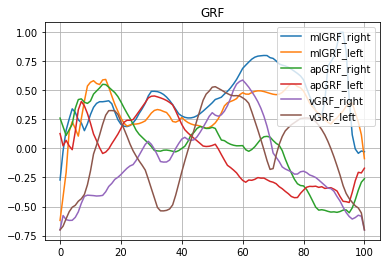

In [26]:
import matplotlib.pyplot as plt
plt.title('GRF')
plt.grid(True)

j = range(101)
# plt.plot(j, X[0, 0, 0:101], label="vGRF")

# plt.plot(j, X[0, 1, 0:101], label='apGRF')

# plt.plot(j, X[0, 2, 0:101], label='mlGRF')

plt.plot(j, train_X[0, 0, :101], label="mlGRF_right")
plt.plot(j, train_X[0, 0, 303:404], label="mlGRF_left")

plt.plot(j, train_X[0, 0, 101:202], label='apGRF_right')
plt.plot(j, train_X[0, 0, 404:505], label='apGRF_left')

plt.plot(j, train_X[0, 0, 202:303], label='vGRF_right')
plt.plot(j, train_X[0, 0, 505:606], label='vGRF_left')

plt.legend(loc='best')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers, regularizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, InputLayer, Dense, Dropout, Activation, Flatten, concatenate, Conv1D, MaxPooling1D, Input, Reshape, Bidirectional
from keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
import time
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import seaborn as sns

# NAME = "HC-vs-C-LSTM_2class"
# NAME = "HC-vs-A-LSTM_2class"
# NAME = "HC-vs-K-LSTM_2class"
# NAME = "HC-vs-H-LSTM_2class"
# NAME = "HC-vs-GDs-LSTM_2class"
# NAME = "H-vs-K-vs-A-vs-C-LSTM_4class"
#NAME = "HC-vs-H-vs-K-vs-A-vs-C-LSTM_5class"
NAME = "H-vs-K-vs-A-vs-C-CNN_4class"
# NAME = "HC-vs-Patients-CNN_5class"
# NAME = "HC-vs-GDs-CNN_2class"
# NAME = "HC-vs-H-CNN_2class"
# NAME = "HC-vs-K-CNN_2class"
# NAME = "HC-vs-A-CNN_2class"
# NAME = "HC-vs-C-CNN_2class"

# 学習
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        # patience=2,
                )

# checkpointの設定
checkpoint = ModelCheckpoint(
                    filepath="saved_model/{}".format(NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                )
# CNN-A---------------------------------------------------------------------------------------------------------------------
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(6, 6), 
#                  kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
#                  bias_initializer=tf.keras.initializers.Zeros(),
#                  strides=(1, 1), 
#                  input_shape=(6, 101, 1)))
# model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(4)) # 4クラス分類
# model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# CNN-A3---------------------------------------------------------------------------------------------------------------------
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(6, 3), 
#                  kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
#                  bias_initializer=tf.keras.initializers.Zeros(),
#                  strides=(1, 1), 
#                  input_shape=(6, 101, 1)))
# model.add(Activation('relu'))

# model.add(Conv2D(32, kernel_size=(1, 3), 
#                  strides=(1, 1)))
# model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(4)) # 4クラス分類
# model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# CNN-A6---------------------------------------------------------------------------------------------------------------------
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(6, 6), 
#                  kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
#                  bias_initializer=tf.keras.initializers.Zeros(),
#                  strides=(1, 1), 
#                  input_shape=(6, 101, 1)))
# model.add(Activation('relu'))

# model.add(Conv2D(32, kernel_size=(1, 6), 
#                  strides=(1, 1)))
# model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(4)) # 4クラス分類
# model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# CNN-C6---------------------------------------------------------------------------------------------------------------------
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(6, 6), 
#                  kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
#                  bias_initializer=tf.keras.initializers.Zeros(),
#                  strides=(1, 1), 
#                  input_shape=(6, 101, 1)))
# model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(4)) # 4クラス分類
# model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# CNN-C3---------------------------------------------------------------------------------------------------------------------
model = Sequential()

initializer = tf.initializers.he_normal()

model.add(Conv2D(32, kernel_size=(3, 3), 
                 kernel_initializer=initializer,
                 strides=(1, 1), 
                 input_shape=(6, 101, 1)))
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(3, 3), 
                 strides=(1, 1)))
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(2, 2), 
                 strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(4)) # 4クラス分類
model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# separated_1D-CNN----------------------------------------------------------------------------------------------------------------------
# dropout_rate = 0.5

# # ML_right_input = Input(shape=(101, 1), name="ML_right")
# # ML_left_input = Input(shape=(101, 1), name="ML_left")
# # AP_right_input = Input(shape=(101, 1), name="AP_right")
# # AP_left_input = Input(shape=(101, 1), name="AP_left")
# V_right_input = Input(shape=(101, 1), name="V_right")
# V_left_input = Input(shape=(101, 1), name="V_left")

# ML_right_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_right_input)
# ML_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_right_features)
# ML_right_features = MaxPooling1D(pool_size=2)(ML_right_features)
# ML_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_right_features)
# ML_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_right_features)
# ML_right_features = MaxPooling1D(pool_size=2)(ML_right_features)
# ML_right_features = Flatten()(ML_right_features)
# ML_right_features = Dropout(rate=dropout_rate)(ML_right_features)
# ML_right_features = Dense(100, activation='relu')(ML_right_features)

# ML_left_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_left_input)
# ML_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_left_features)
# ML_left_features = MaxPooling1D(pool_size=2)(ML_left_features)
# ML_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_left_features)
# ML_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_left_features)
# ML_left_features = MaxPooling1D(pool_size=2)(ML_left_features)
# ML_left_features = Flatten()(ML_left_features)
# ML_left_features = Dropout(rate=dropout_rate)(ML_left_features)
# ML_left_features = Dense(100, activation='relu')(ML_left_features)

# AP_right_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_right_input)
# AP_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_right_features)
# AP_right_features = MaxPooling1D(pool_size=2)(AP_right_features)
# AP_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_right_features)
# AP_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_right_features)
# AP_right_features = MaxPooling1D(pool_size=2)(AP_right_features)
# AP_right_features = Flatten()(AP_right_features)
# AP_right_features = Dropout(rate=dropout_rate)(AP_right_features)
# AP_right_features = Dense(100, activation='relu')(AP_right_features)

# AP_left_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_left_input)
# AP_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_left_features)
# AP_left_features = MaxPooling1D(pool_size=2)(AP_left_features)
# AP_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_left_features)
# AP_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_left_features)
# AP_left_features = MaxPooling1D(pool_size=2)(AP_left_features)
# AP_left_features = Flatten()(AP_left_features)
# AP_left_features = Dropout(rate=dropout_rate)(AP_left_features)
# AP_left_features = Dense(100, activation='relu')(AP_left_features)

# V_right_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_right_input)
# V_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_right_features)
# V_right_features = MaxPooling1D(pool_size=2)(V_right_features)
# V_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_right_features)
# V_right_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_right_features)
# V_right_features = MaxPooling1D(pool_size=2)(V_right_features)
# V_right_features = Flatten()(V_right_features)
# V_right_features = Dropout(rate=dropout_rate)(V_right_features)
# V_right_features = Dense(100, activation='relu')(V_right_features)

# V_left_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_left_input)
# V_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_left_features)
# V_left_features = MaxPooling1D(pool_size=2)(V_left_features)
# V_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_left_features)
# V_left_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_left_features)
# V_left_features = MaxPooling1D(pool_size=2)(V_left_features)
# V_left_features = Flatten()(V_left_features)
# V_left_features = Dropout(rate=dropout_rate)(V_left_features)
# V_left_features = Dense(100, activation='relu')(V_left_features)

# # concat = concatenate([ML_right_features, ML_left_features, AP_right_features, AP_left_features, V_right_features, V_left_features])
# concat = concatenate([V_right_features, V_left_features])
# concat = Dropout(rate=dropout_rate)(concat)
# Dense1 = Dense(100, activation='relu')(concat)
# Dense1 = Dropout(rate=dropout_rate)(Dense1)
# Dense2 = Dense(20, activation='relu')(Dense1)
# output = Dense(4, activation='softmax')(Dense2)

# model = Model(
#     #inputs=[ML_right_input, ML_left_input, AP_right_input, AP_left_input, V_right_input, V_left_input],
#     inputs=[V_right_input, V_left_input],
#     outputs=output,
# )
#-----------------------------------------------------------------------------------------------------------------------------

# Bi-LSTM---------------------------------------------------------------------------------------------------------------------
# model = Sequential()

# X = np.reshape(train_X, (-1, 101, 6))
# validation_X = np.reshape(test_X, (-1, 101, 6))

# model.add(InputLayer(input_shape=(101, 6)))
# model.add(Bidirectional(LSTM(units=64, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=True)))
# model.add(Bidirectional(LSTM(units=64, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=False)))

# model.add(Dense(units=4, activation='softmax'))
# # model.add(Dense(units=1, activation='sigmoid'))

#-----------------------------------------------------------------------------------------------------------------------------

#separated-LSTM-------------------------------------------------------------------------------------------------------------------------
# dropout_rate = 0.5

# ML_right_input = Input(shape=(101, 1), name="ML_right")
# ML_left_input = Input(shape=(101, 1), name="ML_left")
# AP_right_input = Input(shape=(101, 1), name="AP_right")
# AP_left_input = Input(shape=(101, 1), name="AP_left")
# V_right_input = Input(shape=(101, 1), name="V_right")
# V_left_input = Input(shape=(101, 1), name="V_left")

# #ML_right_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=True)(ML_right_input)
# ML_right_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=False)(ML_right_input)
# #ML_left_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=True)(ML_left_input)
# ML_left_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=False)(ML_left_input)

# #AP_right_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=True)(AP_right_input)
# AP_right_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=False)(AP_right_input)
# #AP_left_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=True)(AP_left_input)
# AP_left_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=False)(AP_left_input)

# #V_right_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=True)(V_right_input)
# V_right_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=False)(V_right_input)
# #V_left_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=True)(V_left_input)
# V_left_features = LSTM(64, activation='tanh', dropout=dropout_rate, return_sequences=False)(V_left_input)

# concat = concatenate([ML_right_features, ML_left_features, AP_right_features, AP_left_features, V_right_features, V_left_features])
# output = Dense(4, activation='softmax')(concat)

# model = Model(
#     inputs=[ML_right_input, ML_left_input, AP_right_input, AP_left_input, V_right_input, V_left_input],
#     outputs=output,
# )
#-----------------------------------------------------------------------------------------------------------------------------

# 共通

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# 5クラス分類, 4クラス分類
# model.compile(loss='sparse_categorical_crossentropy', 
#               optimizer= optimizers.Adam(lr=0.002, beta_1= 0.9, beta_2= 0.999),
#               metrics=['accuracy'],
#               )

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optimizers.SGD(lr=5e-2, decay=1e-2),
              metrics=['accuracy'],
              )

# 2クラス分類
# model.compile(loss='binary_crossentropy',
#               optimizer= optimizers.SGD(lr=5e-3),
#               metrics=['accuracy'],
#               )

model.summary()

# X = np.reshape(train_X, (-1, 101, 6))
# reshaped_ML_right = np.reshape(X[::, ::, 0], (X.shape[0], X.shape[1], 1))
# reshaped_ML_left = np.reshape(X[::, ::, 1], (X.shape[0], X.shape[1], 1))
# reshaped_AP_right = np.reshape(X[::, ::, 2], (X.shape[0], X.shape[1], 1))
# reshaped_AP_left = np.reshape(X[::, ::, 3], (X.shape[0], X.shape[1], 1))
# reshaped_V_right = np.reshape(X[::, ::, 4], (X.shape[0], X.shape[1], 1))
# reshaped_V_left = np.reshape(X[::, ::, 5], (X.shape[0], X.shape[1], 1))

# model.fit({"ML_right": reshaped_ML_right, "ML_left": reshaped_ML_left,
#            "AP_right": reshaped_AP_right, "AP_left": reshaped_AP_left,
#            "V_right": reshaped_V_right, "V_left": reshaped_V_left,
#            }, 
#           train_y,
#           batch_size=10,
#           epochs=100,
#           validation_split=0.2,
#           callbacks=[tensorboard, checkpoint])

# model.fit({
#            "V_right": reshaped_V_right, "V_left": reshaped_V_left,
#            }, 
#           train_y,
#           batch_size=10,
#           epochs=100,
#           validation_split=0.2,
#           callbacks=[tensorboard, checkpoint])

X = np.reshape(train_X, (-1, 6, 101, 1))
model.fit(X, 
          train_y,
          batch_size=3,
          epochs=1000,
          validation_split=0.2,
          shuffle=True,
          callbacks=[tensorboard, checkpoint])

# training parameters = kernel_size * (1Dだったらここは1, 2Dだったらここはkernel_size) * output_channels + num_bias
# 216 = 8 * 1 * 24 + 24

In [45]:
# CNN-A3---------------------------------------------------------------------------------------------------------------------
model = Sequential()

model.add(Conv2D(32, kernel_size=(6, 3), 
                 kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
                 bias_initializer=tf.keras.initializers.Zeros(),
                 strides=(1, 1), 
                 input_shape=(6, 101, 1)))
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(1, 3), 
                 strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(4)) # 4クラス分類
model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# CNN-A6---------------------------------------------------------------------------------------------------------------------
model = Sequential()

model.add(Conv2D(32, kernel_size=(6, 6), 
                 kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
                 bias_initializer=tf.keras.initializers.Zeros(),
                 strides=(1, 1), 
                 input_shape=(6, 101, 1)))
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(1, 6), 
                 strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(4)) # 4クラス分類
model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# CNN-C3---------------------------------------------------------------------------------------------------------------------
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), 
                 kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
                 bias_initializer=tf.keras.initializers.Zeros(),
                 strides=(1, 1), 
                 input_shape=(6, 101, 1)))
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(3, 3), 
                 strides=(1, 1)))
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(2, 2), 
                 strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(4)) # 4クラス分類
model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

# CNN-C6---------------------------------------------------------------------------------------------------------------------
model = Sequential()

model.add(Conv2D(32, kernel_size=(6, 6), 
                 kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), 
                 bias_initializer=tf.keras.initializers.Zeros(),
                 strides=(1, 1), 
                 input_shape=(6, 101, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(4)) # 4クラス分類
model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
# モデル復元
import tensorflow as tf
from tensorflow.keras import optimizers, regularizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Input, Reshape, Bidirectional
from keras.layers.recurrent import LSTM
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
import time
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import seaborn as sns
import numpy as np

model = Sequential()

X = np.reshape(train_X, (-1, 101, 6))
validation_X = np.reshape(test_X, (-1, 101, 6))

model.add(Bidirectional(LSTM(units=101, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=True)))
model.add(Bidirectional(LSTM(units=101, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=False)))

model.add(Dense(units=5, activation='softmax'))
# model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer= optimizers.Adam(lr=0.002, beta_1= 0.9, beta_2= 0.999),
              metrics=['accuracy'],
              )

model.load_weights("/saved_model/H-vs-K-vs-A-vs-C-CNN_4class/assets")

model.summary()
model.fit(X, train_y,
          batch_size=5,
          epochs=1000,
          validation_split=0.2,
          callbacks=[tensorboard])

In [ ]:
# 混合行列
predict_classes = model.predict_classes(validation_X)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
print(cmx)

index1 = ["HC", "Hip", "Knee", "Ankle", "Calcaneus"]
# index1 = ["HC", "Knee"]

print(classification_report(true_classes, predict_classes, target_names=index1))

ax= plt.subplot()
sns.heatmap(cmx, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(index1); 
ax.yaxis.set_ticklabels(index1);
plt.show()

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
%reload_ext tensorboard
# %load_ext tensorboard
log_dir="logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
%tensorboard --logdir logs/